In [2]:

#%%# libraries 
import networkx as nx
import pickle
import os
import re
import gc
import config as conf
import util_functions as ut
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import create_macposts_files as macposts
import tdsp_macposts as tdsp
cwd = os.getcwd()

Read successful


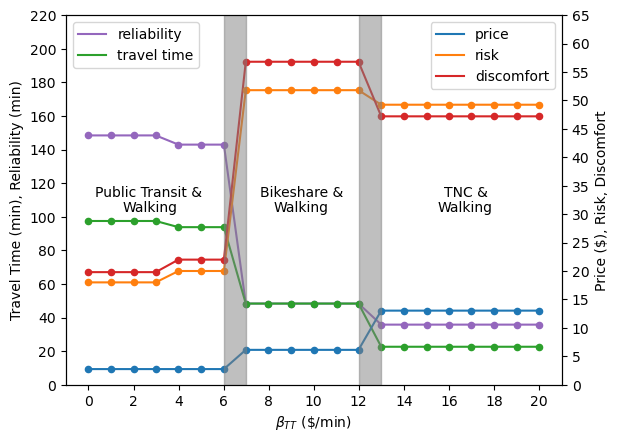

In [6]:
# %% CASE STUDY: bTT
filename = '/home/lgraff/Documents/images/path_costs_bTT.pkl'
with open(filename, 'rb') as handle:
    path_costs = pickle.load(handle)

betas_used = list(zip(*list(path_costs.keys()))) # tuple(zip(*list(zip(*path_costs))[0]))
betas_tt = betas_used[0]
#betas_rel = betas_used[1]
cost_dict = list(path_costs.values())

all_prices = [d['price_total'] for d in cost_dict]
all_risk = [d['risk_total'] for d in cost_dict]
all_rel = [d['rel_total'] for d in cost_dict]
all_tt = [d['tt_total'] for d in cost_dict]
all_disc = [d['discomfort_total'] for d in cost_dict]

x_axis = np.array(betas_tt)*3600
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax2.plot(x_axis, all_prices, label='price', color='C0',  zorder=0)
ax2.plot(x_axis, all_risk, label='risk', color='C1',  zorder=0)
ax1.plot(x_axis, all_rel, label='reliability', color='C4',  zorder=0)
ax1.plot(x_axis, all_tt, label='travel time', color='C2',  zorder=0)
ax2.plot(x_axis, all_disc, label='discomfort', color='C3',  zorder=0)

ax2.scatter(x_axis, all_prices, color='C0',  zorder=0, s=20)
ax2.scatter(x_axis, all_risk, color='C1',  zorder=0, s=20)
ax1.scatter(x_axis, all_rel, color='C4',  zorder=0, s=20)
ax1.scatter(x_axis, all_tt, color='C2',  zorder=0, s=20)
ax2.scatter(x_axis, all_disc, color='C3',  zorder=0, s=20)
# note where the mode shift occurs
ax2.axvspan(6,7, alpha=0.5, color='grey')
ax2.axvspan(12,13, alpha=0.5, color='grey')

#plt.axvline(x=6, color='black',linestyle='--',linewidth=2)
#plt.axvline(x=12, color='black',linestyle='--',linewidth=2)
# distinguish region by mode type
ax2.text(0.3, 33,'Public Transit &',fontsize='medium', zorder=1)
ax2.text(1.5, 30.5,'Walking',fontsize='medium', zorder=1)
ax2.text(7.6, 33,'Bikeshare &',fontsize='medium', zorder=1)
ax2.text(8.2, 30.5,'Walking',fontsize='medium', zorder=1)
ax2.text(15.8, 33,'TNC &',fontsize='medium', zorder=1)
ax2.text(15.5, 30.5,'Walking',fontsize='medium', zorder=1)

ax1.set_ylabel('Travel Time (min), Reliability (min)')
ax2.set_ylabel('Price ($), Risk, Discomfort')
ax1.set_xlabel(r'$\beta_{TT}\ (\$/$min)')   #$\beta_{TT}$')
ax2.legend(loc='upper right')
ax1.legend(loc='upper left')
ax2.set_xticks(np.arange(0,22,2), fontsize=10)
ax1.set_yticks(np.arange(0,240,20), fontsize=6)
ax2.set_yticks(np.arange(0,70,5), fonrtsize=6)
#plt.setp(ax1.get_xticklabels(), visible=True) #not ax2
#plt.xticks(range(len(all_tt)), x_axis, size='small')

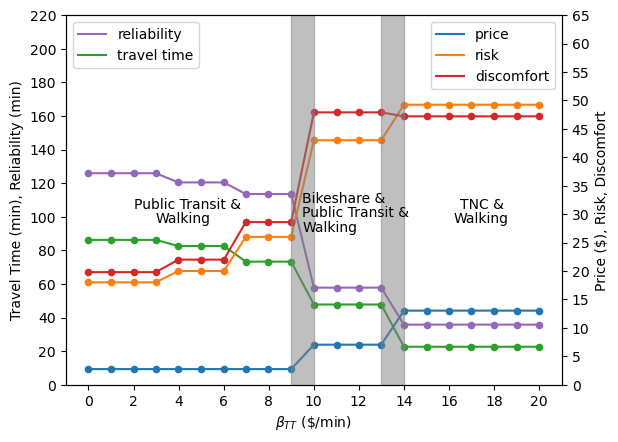

In [3]:
# CASE STUDY: bus frequency
# %%
filename = '/home/lgraff/Documents/images/path_costs_bus_freq.pkl'
with open(filename, 'rb') as handle:
    path_costs = pickle.load(handle)

betas_used = list(zip(*list(path_costs.keys()))) # tuple(zip(*list(zip(*path_costs))[0]))
betas_tt = betas_used[0]
#betas_rel = betas_used[1]
cost_dict = list(path_costs.values())

all_prices = [d['price_total'] for d in cost_dict]
all_risk = [d['risk_total'] for d in cost_dict]
all_rel = [d['rel_total'] for d in cost_dict]
all_tt = [d['tt_total'] for d in cost_dict]
all_disc = [d['discomfort_total'] for d in cost_dict]

x_axis = np.array(betas_tt)*3600
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax2.plot(x_axis, all_prices, label='price', color='C0',  zorder=0)
ax2.plot(x_axis, all_risk, label='risk', color='C1',  zorder=0)
ax1.plot(x_axis, all_rel, label='reliability', color='C4',  zorder=0)
ax1.plot(x_axis, all_tt, label='travel time', color='C2',  zorder=0)
ax2.plot(x_axis, all_disc, label='discomfort', color='C3',  zorder=0)

ax2.scatter(x_axis, all_prices, color='C0',  zorder=0, s=20)
ax2.scatter(x_axis, all_risk, color='C1',  zorder=0, s=20)
ax1.scatter(x_axis, all_rel, color='C4',  zorder=0, s=20)
ax1.scatter(x_axis, all_tt, color='C2',  zorder=0, s=20)
ax2.scatter(x_axis, all_disc, color='C3',  zorder=0, s=20)
# note where the mode shift occurs
ax2.axvspan(9,10, alpha=0.5, color='grey')
ax2.axvspan(13,14, alpha=0.5, color='grey')

# distinguish region by mode type
ax2.text(2, 31,'Public Transit &',fontsize='medium', zorder=1)
ax2.text(3, 28.5,'Walking',fontsize='medium', zorder=1)
ax2.text(9.5, 32,'Bikeshare &',fontsize='medium', zorder=1)
ax2.text(9.5, 29.5,'Public Transit &',fontsize='medium', zorder=1)
ax2.text(9.5, 27,'Walking',fontsize='medium', zorder=1)
ax2.text(16.5, 31,'TNC &',fontsize='medium', zorder=1)
ax2.text(16.2, 28.5,'Walking',fontsize='medium', zorder=1)
ax1.set_ylabel('Travel Time (min), Reliability (min)')
ax2.set_ylabel('Price ($), Risk, Discomfort')
ax1.set_xlabel(r'$\beta_{TT}\ (\$/$min)')   #$\beta_{TT}$')
ax2.legend(loc='upper right')
ax1.legend(loc='upper left')
ax2.set_xticks(np.arange(0,22,2), fontsize=10)
ax1.set_yticks(np.arange(0,240,20), fontsize=6)
ax2.set_yticks(np.arange(0,70,5), fonrtsize=6)

In [4]:
2.92 + 1.53 + 1.81 + 8.32/4

8.34